# Spaceship Titanic

### Installing Required Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading and understanding data

In [41]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

In [42]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [43]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [45]:
df_test.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.00,4184,4195.00,4171.00,4179.00,4176.00,4197.00,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.66,NaN,219.27,439.48,177.30,303.05,310.71,NaN
std,NaN,NaN,NaN,NaN,NaN,14.18,NaN,607.01,1527.66,560.82,1117.19,1246.99,NaN
min,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.00,NaN,53.00,78.00,33.00,50.00,36.00,NaN


Let's see value count of categorical variables.

In [46]:
df_train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [47]:
df_train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [48]:
df_train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

We will check for any missing values.

In [49]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [50]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Let's check if there are any duplicated rows in the datasets.

In [51]:
df_train.duplicated().sum()

0

In [52]:
df_test.duplicated().sum()

0

## Exploratory Data Analysis

### Missing Data

Around 2 % of our data is missing in almost all the columns, but let's see how the nulls are located.

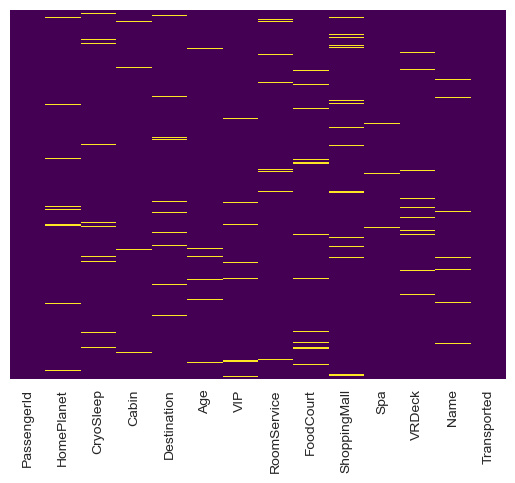

In [53]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

Missing values are spread out around the whole dataset quite evenly. 
I realized we cannot drop them, because the test data as well has them, and if we drop them there, we will be missing some labels. Therefore, our score will go down. We'll have to impute with the most reasonable values.

Let's visualize more data. I will be analysing only the train dataset but making changes in both of them.

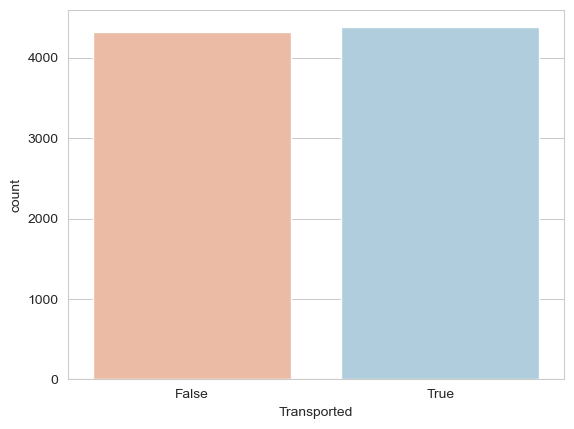

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', data=df_train, palette='RdBu');

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


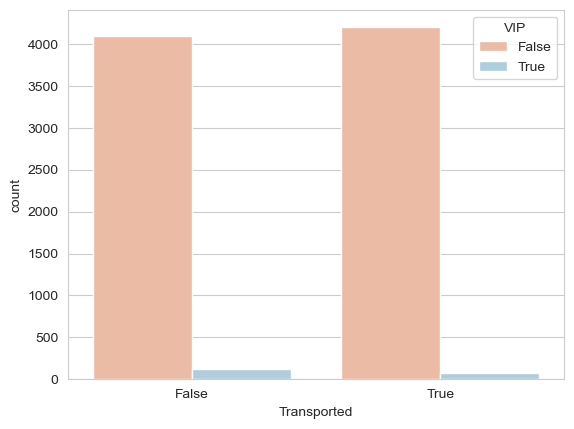

In [56]:
sns.countplot(x='Transported', hue='VIP', data=df_train, palette='RdBu');

Interestingly, looks like if you are VIP, you have less chance to be transported. 

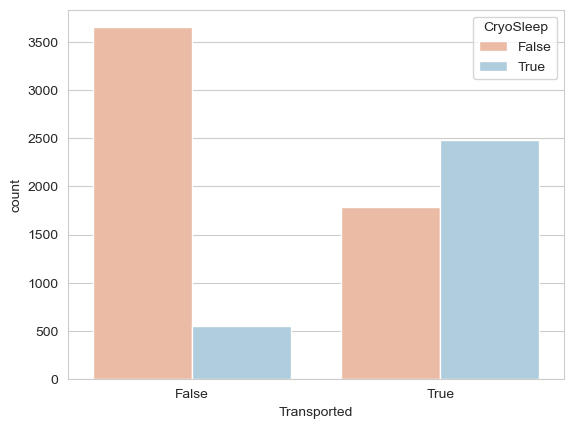

In [18]:
sns.countplot(x='Transported', hue='CryoSleep', data=df_train, palette='RdBu');

I just wanted to see if there is any other way to make the same plot, and I found the one below, let me know if you like it.

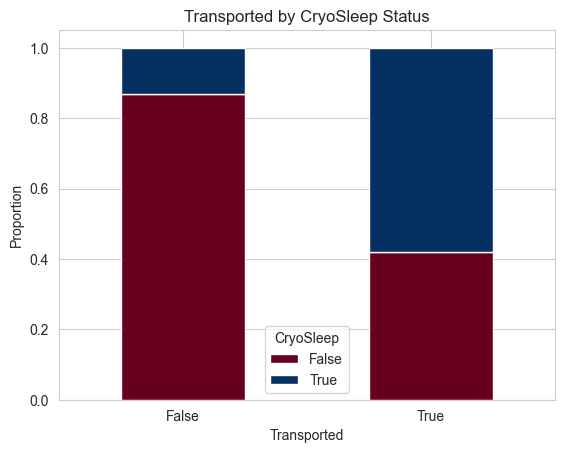

In [19]:
# Create a cross-tabulation
ct = pd.crosstab(df_train['Transported'], df_train['CryoSleep'], normalize='index')

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, colormap='RdBu')
plt.title('Transported by CryoSleep Status')
plt.xlabel('Transported')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Horizontal x labels
plt.legend(title='CryoSleep')
plt.show()

Here you can see that people who are transported seems to be proportionally more in CryoSleep. Does this makes sense?

The same you can see from my plot. But fine. To understand if it makes sense, we should be on that imaginary spaceship and experience a crush (?) or whatever they experienced. My guess that they are waken up during a crush and get specific instruction how to be transported, while others are chilling in the spa or walking around.

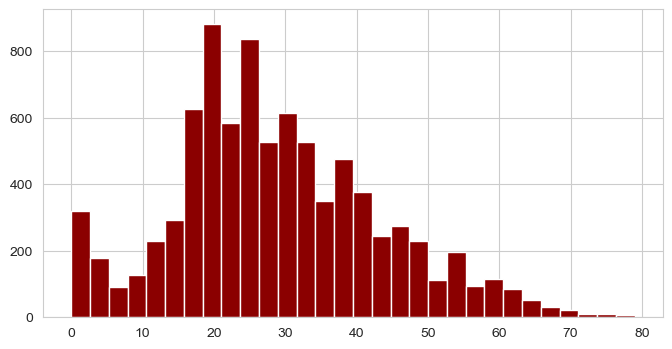

In [57]:
df_train.Age.hist(color='darkred', bins=30, figsize=(8,4));

Do we need the above plot? - We do not. I deleted it. Do you like a plot with Ages?

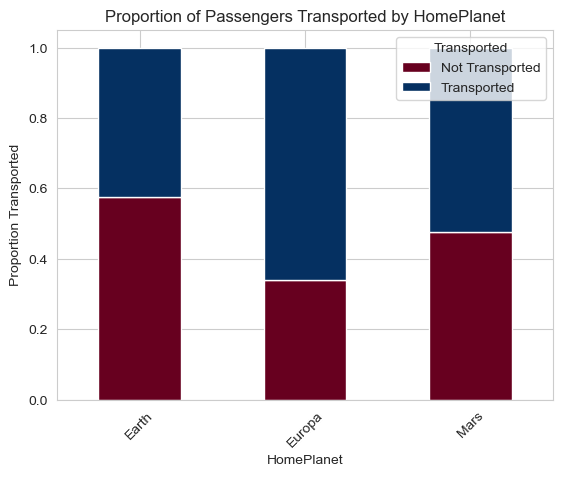

In [58]:
df_train_copy = df_train.copy() 
# Convert 'Transported' to an integer to ease calculations (True to 1, False to 0)
df_train_copy['Transported'] = df_train_copy['Transported'].astype(int)

# Calculate the proportion of Transported for each category in 'HomePlanet'
proportion_data = df_train_copy.groupby('HomePlanet')['Transported'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
proportion_data.plot(kind='bar', stacked=True, colormap='RdBu')
plt.title('Proportion of Passengers Transported by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Proportion Transported')
plt.xticks(rotation=45)
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

Well well, it seems people with Europa as HomePlanet are more likely to be transported. Just an observation!

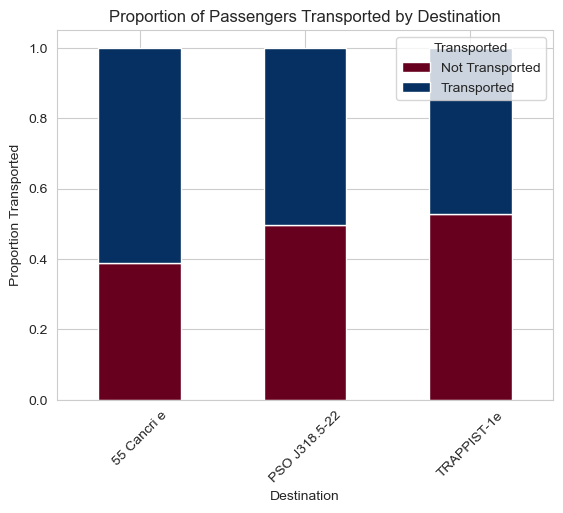

In [59]:
# Calculate the proportion of Transported for each category in 'Destination'
proportion_data = df_train_copy.groupby('Destination')['Transported'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
proportion_data.plot(kind='bar', stacked=True, colormap='RdBu')
plt.title('Proportion of Passengers Transported by Destination')
plt.xlabel('Destination')
plt.ylabel('Proportion Transported')
plt.xticks(rotation=45)
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

People with 55 Cancri e as Destination seem to be more likely to be transported. Oh well!

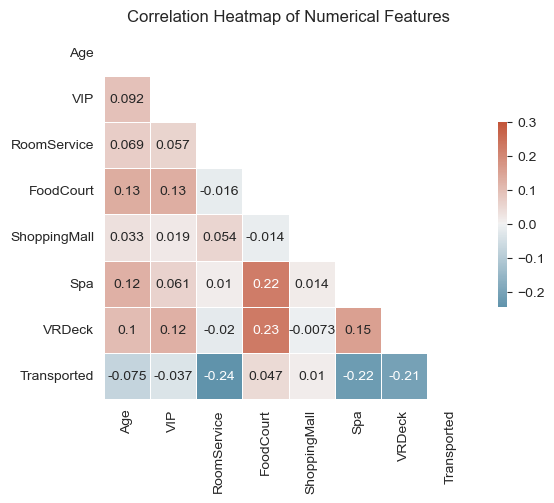

In [60]:
# Convert 'VIP' to an integer (True to 1, False to 0)
df_train_copy['VIP'] = df_train_copy['VIP'].fillna(0).astype(int)

corr_matrix = df_train_copy.corr(numeric_only=True)

# Increase the figure size
#plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose a diverging color scheme
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Literally no good correlation whatsoever. 

## Data Cleaning

From the begining, I will drop `Name` column in both datasets and then create copy of data, just in case

In [61]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [62]:
# Create copies of the datasets, just in case
data_train = df_train.copy()
data_test =  df_test.copy()

Now, I will deal with a column `Cabin`. We should separate it into 3 columns: `deck`, `num` and `side`.

In [63]:
df_train[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df_train['Cabin'].str.split('/', expand=True)
df_test[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df_test['Cabin'].str.split('/', expand=True)

In [64]:
# Drop original columns
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [65]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,True,F,1,S


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Cabin_Deck    8494 non-null   object 
 13  Cabin_Num     8494 non-null   object 
 14  Cabin_Side    8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [67]:
df_train.Cabin_Deck.value_counts(dropna=False)

F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
NaN     199
T         5
Name: Cabin_Deck, dtype: int64

### Dealing with Nulls

For **categorical columns**, we can simply impute the most common value.

In [68]:
df_train.columns[df_train.dtypes != 'float64']

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
       'Transported', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'],
      dtype='object')

In [69]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'] 

In [70]:
# Most common values in each column
modes = df_train[categorical_columns].mode().iloc[0]
modes

HomePlanet           Earth
CryoSleep            False
Destination    TRAPPIST-1e
VIP                  False
Cabin_Deck               F
Cabin_Num               82
Cabin_Side               S
Name: 0, dtype: object

In [71]:
df_test[categorical_columns].mode().iloc[0]

HomePlanet           Earth
CryoSleep            False
Destination    TRAPPIST-1e
VIP                  False
Cabin_Deck               F
Cabin_Num                4
Cabin_Side               S
Name: 0, dtype: object

Test dataset has the same common values, as train data, except for `Cabin_Num`.

In [72]:
df_train.Cabin_Num.value_counts(dropna=False)

NaN     199
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: Cabin_Num, Length: 1818, dtype: int64

`Cabin_Num` column has a lot of unique value. I am not sure if we need it. Let's keep it for now. Later we will see.

Now, let's fill in missing values with the most common ones in all categorical columns.

In [73]:
df_train[categorical_columns] = df_train[categorical_columns].fillna(modes)
df_test[categorical_columns] = df_test[categorical_columns].fillna(modes)

Now let's deal with **numerical columns**. 

In [74]:
numerical_cols = df_train.columns[df_train.dtypes == 'float64']

In [78]:
numerical_cols = df_train.columns[df_train.dtypes == 'float64']
df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].mean())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].mean())

### Data Preprocessing

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Change Cabin_Num to int
df_train['Cabin_Num'] = df_train['Cabin_Num'].astype(int)

# Separate features and target
X = df_train.drop(['Transported', 'PassengerId'], axis=1)
y = df_train['Transported'].astype(int)  # Convert boolean 'Transported' to int (True to 1, False to 0)

# Define categorical and numerical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num']

# Create the preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply transformations
X_processed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

Make sure you do `pip install lazypredict` & `pip install lightgbm` before running the code below.

In [83]:
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier to fit all models
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the performance of all models
print(models)

100%|██████████| 29/29 [00:16<00:00,  1.78it/s]

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1667
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.81               0.81     0.81      0.81   
XGBClassifier                      0.80               0.80     0.80      0.80   
RandomForestClassifier             0.79               0.79     0.79      0.79   
SVC                                0.79   